# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

- Nama: Makiatul Musyaropah
- Email: makiatulmusyaropah@gmail.com
- Id Dicoding: makiatulmsyr17

### Menyiapkan library yang dibutuhkan

In [ ]:
pip install dotenv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import joblib # Save the model
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
sns.set(style='whitegrid')

### Menyiapkan data yang akan diguankan

## Data Understanding

Dalam bagian ini, lakukan eksplorasi data awal untuk memahami struktur dan isi dari dataset. Langkah-langkah yang dilakukan meliputi pemeriksaan bentuk (shape) data, tipe data pada setiap kolom, nilai yang hilang (missing values), serta distribusi dari variabel target.

Students' Performance

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |


### load data dan menampilkan data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Melihat informasi dari data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i


**Informasi Umum Dataset**

* **Jumlah baris (entri/siswa)**: 4.424 siswa
* **Jumlah kolom (fitur)**: 37 kolom
* **Target / Label**: `Status`
- tidak ada missing value


###  Cek duplicated data

In [ ]:
df.duplicated().sum()

np.int64(0)

tidak ada data yang duplicated

### Cek Imbalance data

<ipython-input-7-89061f811b9b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette=custom_palette)


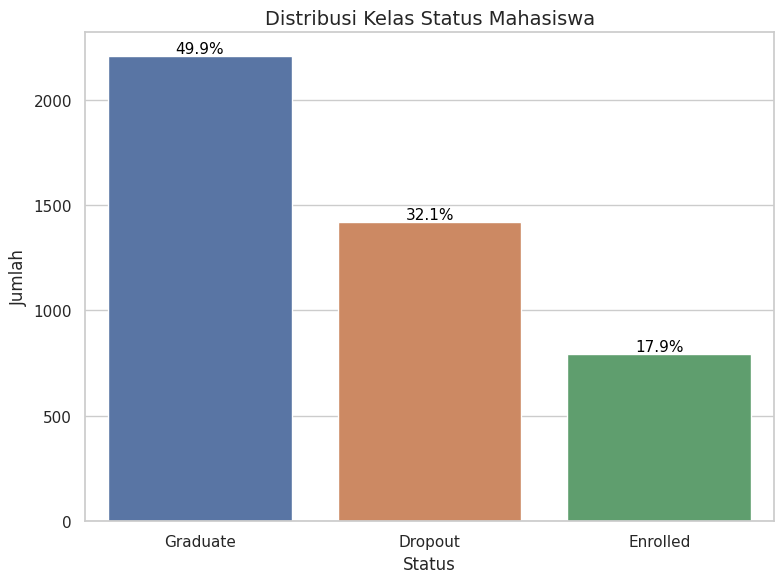

In [ ]:
# Warna khusus untuk setiap kelas
custom_palette = {'Graduate': '#4C72B0', 'Dropout': '#DD8452', 'Enrolled': '#55A868'}

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette=custom_palette)

# Menambahkan persentase pada setiap bar
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11, color='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Kelas Status Mahasiswa', fontsize=14)
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


Hasil
- Graduate (Lulus) merupakan kelas terbanyak, hampir 49,9% dari seluruh data.

- Dropout (Putus sekolah) merupakan kelas kedua terbanyak, sekitar 32,1%.

- Enrolled (Masih aktif belajar) merupakan kelas terkecil, sekitar 17,9%.

Tidak sepenuhnya imbalanced, tapi ada ketimpangan yang cukup signifikan:
- Kelas "Graduate" hampir 3 kali lebih banyak dari "Enrolled".

- Ketidakseimbangan ini perlu diperhatikan terutama saat membangun model klasifikasi.

### Analisis Feature

Bagian ini mengeksplorasi hubungan antara fitur-fitur terpilih dengan variabel target Status. Fitur-fitur tersebut dikelompokkan ke dalam tiga kategori:  financial factors, academic performance, dan demographic attributes.

Melihat kolom financial factors terhadap target

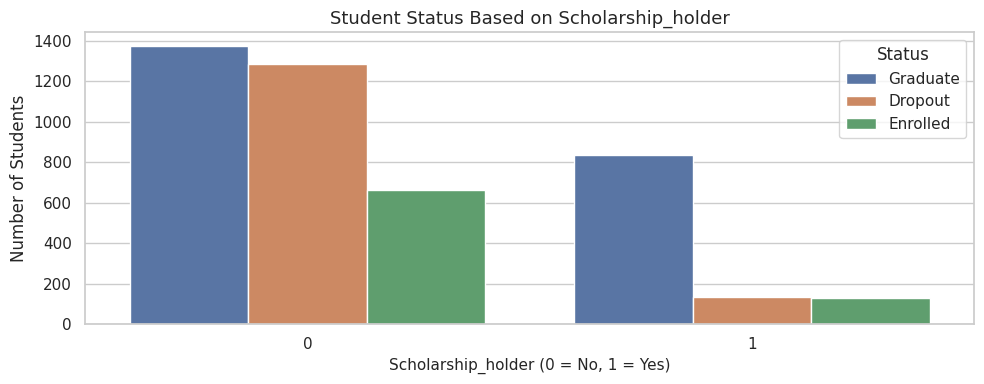

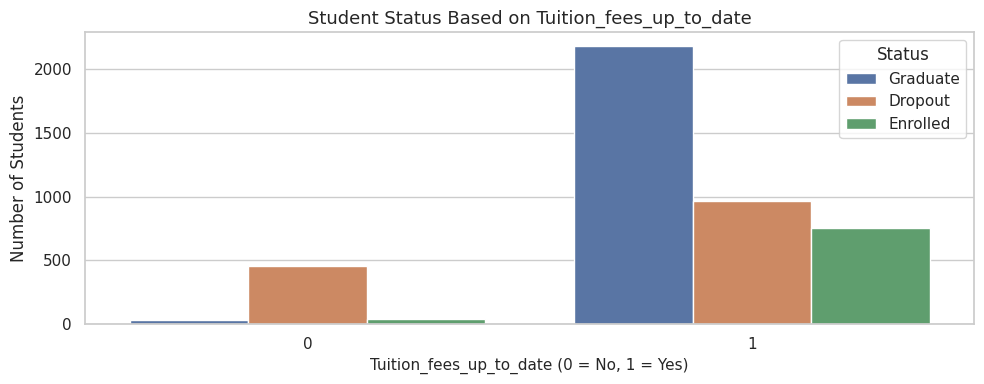

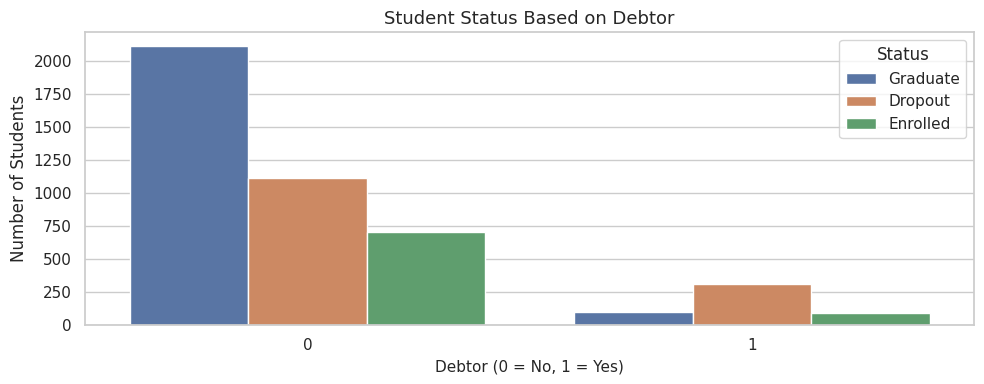

In [ ]:
# Custom palette sesuai kelas Status
custom_palette = {'Graduate': '#4C72B0', 'Dropout': '#DD8452', 'Enrolled': '#55A868'}

# 1. Scholarship_holder vs Status
plt.figure(figsize=(10, 4))
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette=custom_palette,
              hue_order=['Graduate', 'Dropout', 'Enrolled'])
plt.title('Student Status Based on Scholarship_holder', fontsize=13)
plt.xlabel('Scholarship_holder (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Students')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# 2. Tuition_fees_up_to_date vs Status
plt.figure(figsize=(10, 4))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df, palette=custom_palette,
              hue_order=['Graduate', 'Dropout', 'Enrolled'])
plt.title('Student Status Based on Tuition_fees_up_to_date', fontsize=13)
plt.xlabel('Tuition_fees_up_to_date (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Students')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# 3. Debtor vs Status
plt.figure(figsize=(10, 4))
sns.countplot(x='Debtor', hue='Status', data=df, palette=custom_palette,
              hue_order=['Graduate', 'Dropout', 'Enrolled'])
plt.title('Student Status Based on Debtor', fontsize=13)
plt.xlabel('Debtor (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Number of Students')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


-  Berdasarkan `Scholarship Ownership` terlihat bahwa mahasiswa yang mendapatkan beasiswa cenderung lebih besar kemungkinannya untuk lulus dibandingkan dengan yang tidak mendapat beasiswa. Hal ini menunjukkan bahwa dukungan finansial dapat berpengaruh positif terhadap keberhasilan akademik.
- `Tuition Fee Status` menunjukkan bahwa mahasiswa yang pembayaran uang kuliahnya tepat waktu lebih banyak yang lulus. Sebaliknya, keterlambatan atau pembayaran yang tidak dilakukan lebih sering terjadi pada mahasiswa yang berhenti studi (dropout). Ini menunjukkan bahwa kestabilan keuangan memegang peranan penting dalam hasil pendidikan.
- `Debt Status` memperlihatkan bahwa kasus dropout lebih tinggi di antara mahasiswa yang memiliki utang. Sebaliknya, sebagian besar mahasiswa yang lulus tidak memiliki catatan utang. Hal ini semakin memperkuat hubungan antara kesulitan finansial dan risiko putus studi.


Melihat Distribusi academic performance terhadap target

<ipython-input-9-b4fe4017a03d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Admission_grade', data=df, palette=custom_palette)


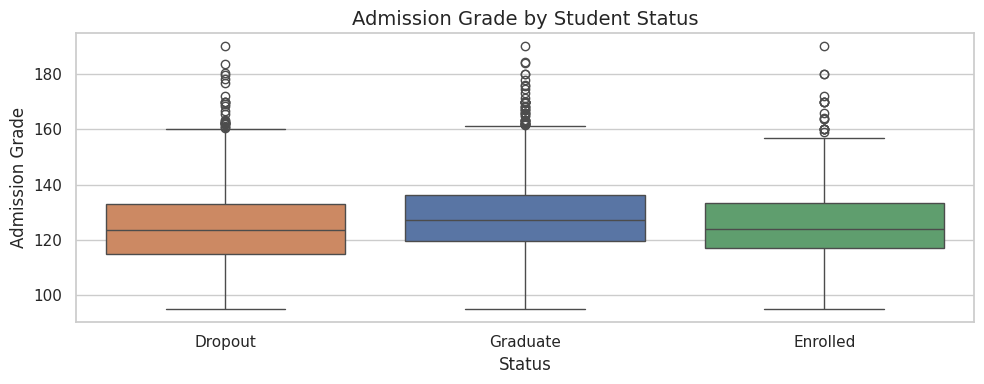

<ipython-input-9-b4fe4017a03d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, palette=custom_palette)


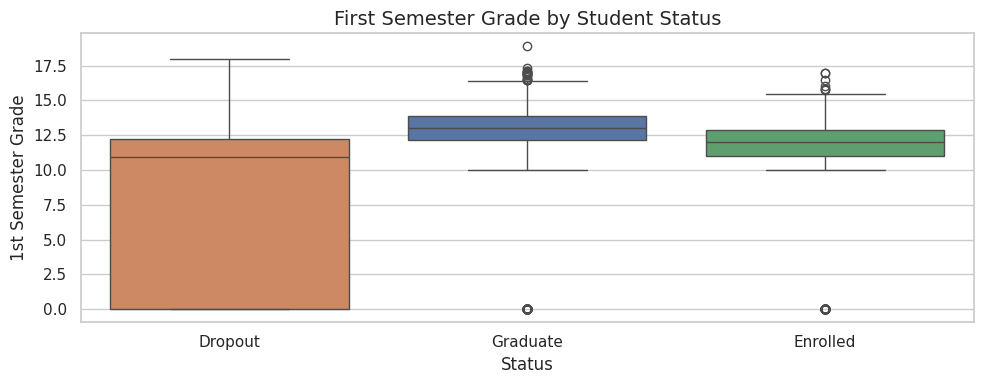

In [ ]:
custom_palette = {'Graduate': '#4C72B0', 'Dropout': '#DD8452', 'Enrolled': '#55A868'}

plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Admission_grade', data=df, palette=custom_palette)
plt.title('Admission Grade by Student Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Admission Grade', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, palette=custom_palette)
plt.title('First Semester Grade by Student Status', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('1st Semester Grade', fontsize=12)
plt.tight_layout()
plt.show()


- Boxplot pada Admission_grade menunjukkan bahwa mahasiswa yang lulus (Graduate) cenderung memiliki nilai masuk yang lebih tinggi dibandingkan dengan mahasiswa yang keluar (Dropout) atau masih terdaftar (Enrolled).

- Boxplot pada Curricular_units_1st_sem_grade menunjukkan bahwa nilai semester pertama memiliki perbedaan yang jelas: mahasiswa yang lulus umumnya memiliki nilai yang lebih tinggi dan konsisten, sementara mahasiswa yang keluar menunjukkan nilai yang lebih rendah dan tersebar. Hal ini menunjukkan bahwa performa akademik di awal masa studi merupakan indikator kuat terhadap risiko putus studi

Melihat Demographic Factors terhadap target

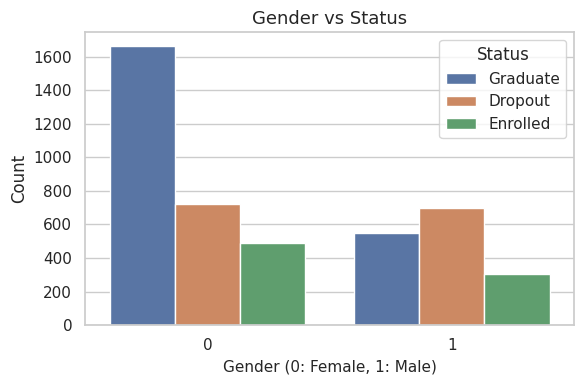

<ipython-input-10-6c019d66edf0>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette=custom_palette)


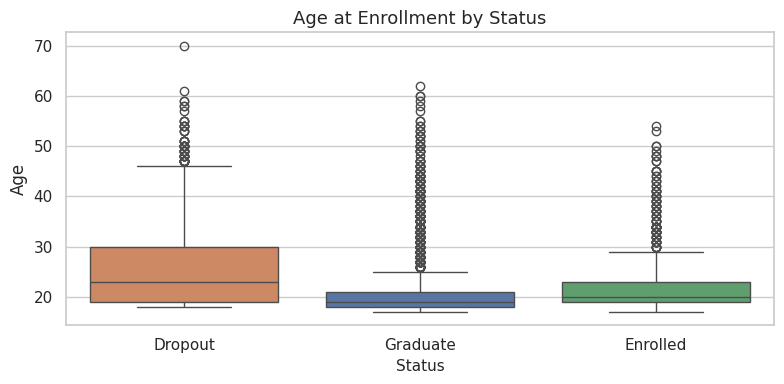

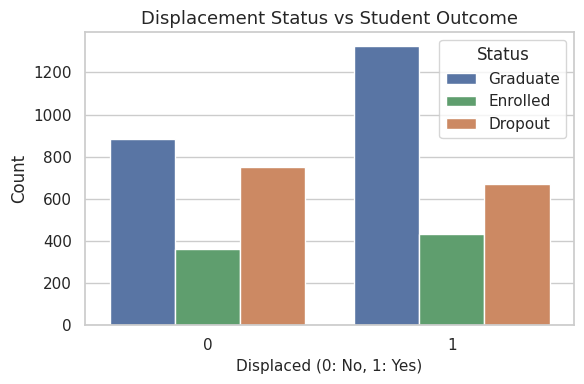

In [ ]:
# Warna khusus untuk setiap kelas Status
custom_palette = {'Graduate': '#4C72B0', 'Dropout': '#DD8452', 'Enrolled': '#55A868'}

# 1. Gender vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Status', data=df, palette=custom_palette)
plt.title('Gender vs Status', fontsize=13)
plt.xlabel('Gender (0: Female, 1: Male)', fontsize=11)
plt.ylabel('Count')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# 2. Age at Enrollment by Status
plt.figure(figsize=(8, 4))
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette=custom_palette)
plt.title('Age at Enrollment by Status', fontsize=13)
plt.xlabel('Status', fontsize=11)
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# 3. Displaced vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Displaced', hue='Status', data=df, palette=custom_palette)
plt.title('Displacement Status vs Student Outcome', fontsize=13)
plt.xlabel('Displaced (0: No, 1: Yes)', fontsize=11)
plt.ylabel('Count')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


-  Distribusi berdasarkan `Gender` menunjukkan bahwa mahasiswa perempuan memiliki tingkat kelulusan yang lebih tinggi dibandingkan mahasiswa laki-laki. Sebaliknya, mahasiswa laki-laki sedikit lebih banyak mengalami dropout. Hal ini menunjukkan bahwa jenis kelamin dapat memengaruhi hasil akademik, di mana mahasiswa perempuan cenderung memiliki capaian penyelesaian studi yang lebih baik.

- Boxplot pada variabel `Age at Enrollment` memperlihatkan bahwa mahasiswa yang lebih muda cenderung memiliki hasil studi yang lebih baik. Lulusan umumnya berusia lebih muda dibandingkan dengan mahasiswa yang dropout atau masih terdaftar. Ini mengindikasikan bahwa usia saat masuk perguruan tinggi mungkin berpengaruh terhadap keberhasilan akademik.

- Status `Displaced` menunjukkan bahwa mahasiswa yang merantau (belajar jauh dari rumah) cenderung lebih mungkin untuk lulus dibandingkan mereka yang tidak merantau. Namun, jumlah dropout tetap tinggi di kedua kelompok, yang mengindikasikan bahwa merantau tidak menjamin keberhasilan akademik, meskipun bisa jadi berkaitan dengan motivasi yang lebih tinggi atau adanya dukungan yang lebih baik.

Cek Corelasi antar feature
- Mengecek korelasi antar fitur (feature correlation) adalah langkah penting dalam proses analisis data eksploratif (EDA) sebelum membangun model machine learning

In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr()
correlation_matrix

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Marital_status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application_mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application_order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime_evening_attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous_qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous_qualification_grade,-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mothers_qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Fathers_qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


Memvisualisasikan agar lebih terlihat

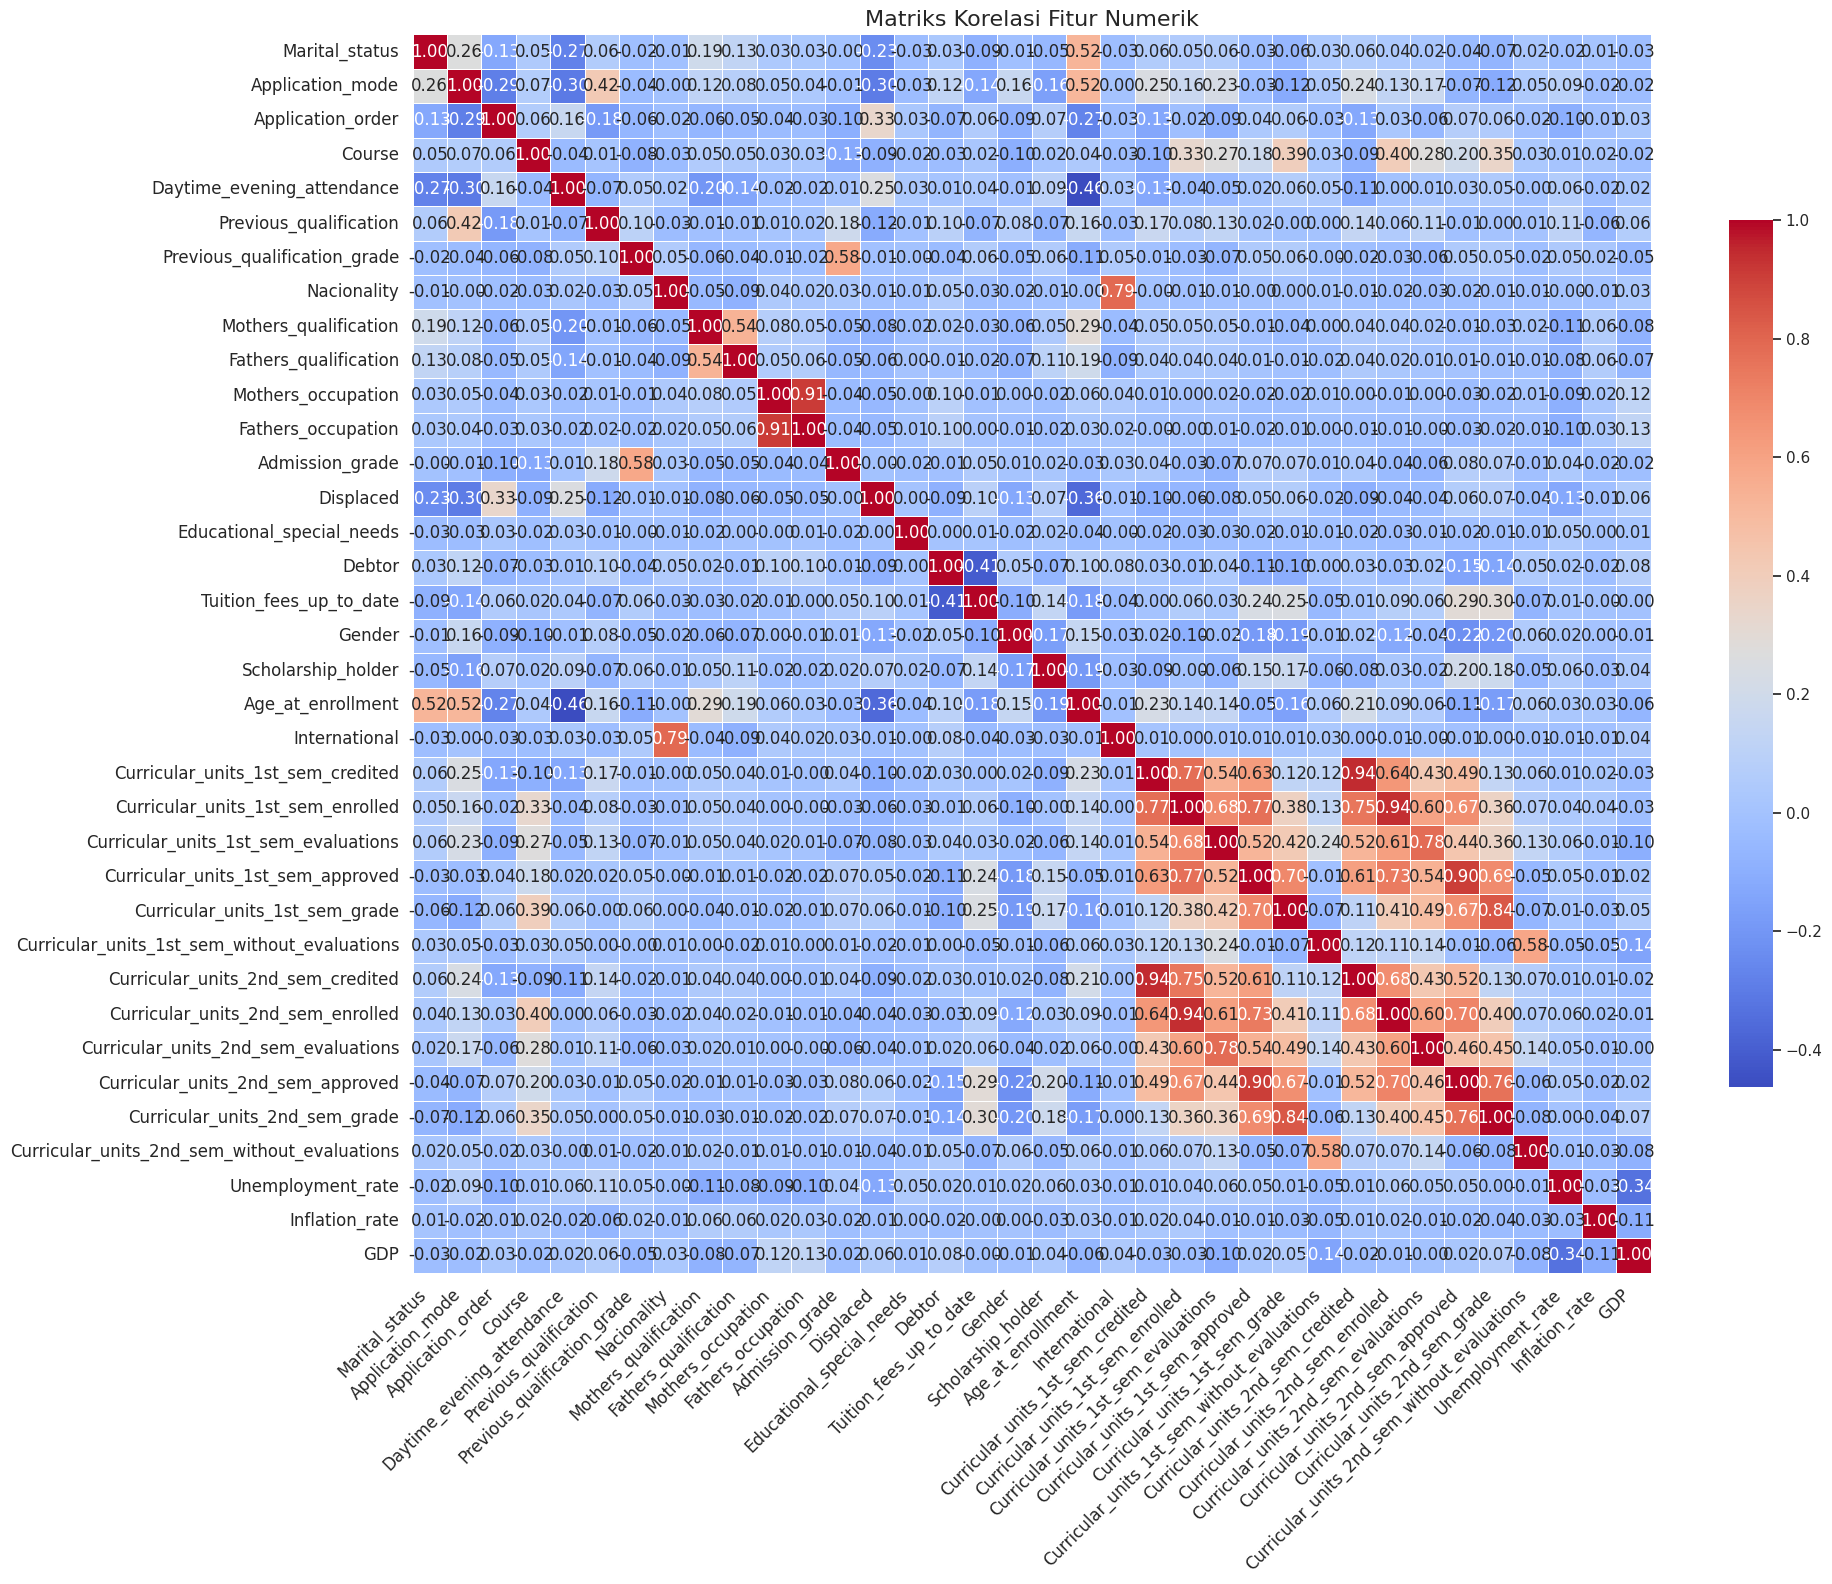

In [ ]:
# Atur ukuran gambar lebih besar
plt.figure(figsize=(20, 16))

# Plot heatmap dengan angka yang lebih besar
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7}, annot_kws={"size": 12})

# Format sumbu
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Matriks Korelasi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


**Isight Korelasi Utama:**

-  **Konsistensi Akademik**
   → Mahasiswa yang mendapatkan SKS di semester 1 hampir selalu tetap menunjukkan performa baik di semester 2. Ini menunjukkan adanya konsistensi akademik antar semester.
   → Korelasi tinggi pada jumlah mata kuliah yang diambil menunjukkan bahwa mahasiswa cenderung mempertahankan beban studi yang serupa di setiap semester.
   → Tingkat kelulusan juga menunjukkan pola serupa, yang mengindikasikan bahwa performa bukan hanya soal usaha, tapi juga kemampuan atau sistem dukungan yang dimiliki.
   → Mahasiswa yang meraih nilai tinggi di semester 1 umumnya tetap unggul di semester berikutnya, sementara yang mengalami kesulitan cenderung terus mengalami kesulitan.
   → Jumlah evaluasi yang diikuti pun relatif stabil, menunjukkan bahwa tingkat keterlibatan mahasiswa tetap konsisten.
-  **Pekerjaan Ibu dan Ayah**
   → Korelasi tinggi antara pekerjaan orang tua menunjukkan bahwa mereka sering berada dalam status ekonomi atau sosial yang serupa, yang kemungkinan besar memengaruhi akses mahasiswa terhadap berbagai sumber daya.
-  **Internasional dan Kewarganegaraan**
   → Keterkaitan yang kuat menunjukkan bahwa status mahasiswa internasional sangat berkaitan dengan label kewarganegaraan tertentu dalam dataset. Hal ini mungkin berdampak pada risiko putus studi atau tantangan penyesuaian akademik.


## Data Preparation / Preprocessing

### Data *Cleaning*

Memhapus isi dari variabel status yang tidak relevan untuk di aanalisis karena kita akan emmprediksi  ['Dropout' 'Graduate']

In [ ]:
# Hapus baris yang memiliki nilai 'Enrolled' pada kolom 'Status'
df = df.loc[df['Status'] != 'Enrolled']

# Tampilkan nilai unik yang tersisa dalam kolom 'Status'
print("Nilai unik pada kolom 'Status':", df['Status'].unique())


Nilai unik pada kolom 'Status': ['Dropout' 'Graduate']


### Encoding
Encoding dilakukan untuk mengubah data kategori seperti teks menjadi format numerik agar dapat diproses oleh algoritma machine learning

In [ ]:
# Copy original dataframe to avoid modifying raw data
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Status' column
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

# Check class mapping
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class mapping:", class_mapping)

Class mapping: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}


### Feature selection

SelectKBest digunakan untuk memilih fitur-fitur yang paling relevan untuk klasifikasi.










In [ ]:
# Separate features and target
X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]

print("Top 20 selected features:")
print(selected_features)

# Create new DataFrame with selected features
df_selected_kbest = df_encoded[selected_features.tolist() + ['Status']]

Top 20 selected features:
Index(['Marital_status', 'Application_mode', 'Application_order',
       'Daytime_evening_attendance', 'Previous_qualification_grade',
       'Admission_grade', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations'],
      dtype='object')


Pemilihan fitur dilakukan secara manual untuk prediksi drop out dini. Pemilihan ini didasarkan pada analisis EDA dan korelasi, dengan fokus pada fitur-fitur yang kemungkinan besar memengaruhi hasil akademik mahasiswa.

In [ ]:
selected_features = [
    'Marital_status',
    'Application_order',
    'Admission_grade',
    'Displaced',
    'Debtor',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment'
]
df_selected = df_encoded[selected_features + ['Status']]


In [ ]:
df_selected

,Marital_status,Application_order,Admission_grade,Displaced,Debtor,Gender,Scholarship_holder,Age_at_enrollment,Status
0,1,5,127.3,1,0,1,0,20,0
1,1,1,142.5,1,0,1,0,19,1
2,1,5,124.8,1,0,1,0,19,0
3,1,2,119.6,1,0,0,0,20,1
4,2,1,141.5,0,0,0,0,45,1
...,...,...,...,...,...,...,...,...,...
4419,1,6,122.2,0,0,1,0,19,1
4420,1,2,119.0,1,1,0,0,18,0
4421,1,1,149.5,1,0,0,1,30,0
4422,1,1,153.8,1,0,0,1,20,1


### Split data

Menangani ketidakseimbangan kelas menggunakan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah data antar kelas.
Setelah data seimbang, dataset dibagi menjadi data latih dan data uji dengan rasio 80:20 untuk keperluan pelatihan dan evaluasi model.

In [ ]:
X = df_selected.drop('Status', axis=1)
y = df_selected['Status']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [ ]:
pip install sqlalchemy psycopg2-binary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.3 MB/s eta 0:00:00


## Modeling

### Random Forest

membuat model random forest dan melakukan hyperparameter tunning mencari best parameter

In [ ]:
# Define the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],         # Minimum leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Apply bootstrap sampling
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model to find the best parameters
random_search.fit(X_resampled, y_resampled)

# Best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Best model from RandomizedSearchCV
best_rf_model_random = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Best parameters found by RandomizedSearchCV:
{'n_estimators': np.int64(150), 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


## Evaluation

Mengevaluasi model didata train

In [ ]:
y_pred_random = best_rf_model_random.predict(X_train)
print(classification_report(y_train, y_pred_random))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1767
           1       0.83      0.80      0.82      1767

    accuracy                           0.82      3534
   macro avg       0.82      0.82      0.82      3534
weighted avg       0.82      0.82      0.82      3534



Hasil evaluasi model pada data **training** menunjukkan bahwa model memiliki performa yang cukup baik dan seimbang antara dua kelas (`Dropout` dan `Graduate`):

* **Akurasi** sebesar **82%**, artinya 82% dari seluruh prediksi di data training adalah benar.
* Untuk kelas **Dropout**:

Karena nilai precision, recall, dan f1-score cukup tinggi dan merata di kedua kelas, ini menunjukkan bahwa model mampu membedakan kedua kelas dengan baik di data latih.


Melakukan test di data testing

In [ ]:
y_pred_random = best_rf_model_random.predict(X_test)
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       442
           1       0.85      0.81      0.83       442

    accuracy                           0.83       884
   macro avg       0.83      0.83      0.83       884
weighted avg       0.83      0.83      0.83       884



Hasil evaluasi model pada **data test** menunjukkan bahwa model memiliki performa yang **sangat baik dan seimbang** dalam mengklasifikasikan data baru:

* **Akurasi** sebesar **83%**, artinya 83% dari seluruh prediksi pada data test adalah benar.
* Untuk kelas **Dropout**:

  * **Precision** 0.87: dari semua prediksi yang diklasifikasikan sebagai Dropout, 87% benar.
  * **Recall** 0.86: dari semua Dropout yang sebenarnya, 86% berhasil dikenali model.
  * **F1-score** 0.87: menunjukkan keseimbangan precision dan recall yang sangat baik.
* Untuk kelas **Graduate**, precision, recall, dan f1-score semuanya **0.87**, yang menandakan konsistensi performa model pada kedua kelas.

Karena skor pada data test hampir mirip dengan skor pada data train, ini menunjukkan bahwa model **tidak overfitting**, mampu melakukan generalisasi dengan baik, dan cocok digunakan untuk memprediksi status Dropout atau Graduate pada data serupa.


### Simpan model

Menyimpan model yang sudah di buat

In [ ]:
# Save the trained model to a file
joblib.dump(best_rf_model_random, 'model.pkl')

# Save the label encoder to a file
joblib.dump(le, 'label_encoder.pkl')

# Save the selected features (removing the 'Status' target)
selected_features = [feature for feature in selected_features if feature != 'Status']
joblib.dump(selected_features, 'features.pkl')

print("Model, scaler, label encoder, and features saved successfully.")

Model, scaler, label encoder, and features saved successfully.


### Save data

menyimpan data yang sudah di bersihkan

In [ ]:
df_selected.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


### Export to Database

mengeksposrt data ke data base

In [ ]:

# Load the environment variables from .env
load_dotenv()

# Ambil variabel dari environment
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Buat connection string
DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Buat engine dan kirim DataFrame
engine = create_engine(DATABASE_URL)
df_selected.to_sql('employee', con=engine, if_exists='replace', index=False)